In [1]:
pip install refractio[snowflake]

     |████████████████████████████████| 12.3MB 14.5MB/s eta 0:00:01
     |████████████████████████████████| 2.5MB 45.1MB/s eta 0:00:01
     |████████████████████████████████| 512kB 41.5MB/s eta 0:00:01
     |████████████████████████████████| 235kB 46.4MB/s eta 0:00:01
     |████████████████████████████████| 18.2MB 42.0MB/s eta 0:00:01
     |████████████████████████████████| 348kB 49.3MB/s eta 0:00:01
     |████████████████████████████████| 143kB 48.4MB/s eta 0:00:01
     |████████████████████████████████| 163kB 49.8MB/s eta 0:00:01
     |████████████████████████████████| 71kB 12.5MB/s eta 0:00:01
     |████████████████████████████████| 71kB 11.1MB/s eta 0:00:01
     |████████████████████████████████| 4.4MB 50.8MB/s eta 0:00:01
     |████████████████████████████████| 61kB 13.0MB/s eta 0:00:01
     |████████████████████████████████| 450kB 48.5MB/s eta 0:00:01
     |████████████████████████████████| 112kB 54.4MB/s eta 0:00:01
     |████████████████████████████████| 61kB 11.5MB/s eta 0:00:

Note: you may need to restart the kernel to use updated packages.


In [8]:
from refractio import snowflake
import matplotlib.pyplot as plt
import pandas as pd
# To read a specific dataset published from a snowflake connection with only top few records.

dataset = snowflake.get_dataframe("PHARMADATA")
dataset.columns

Index(['PHYSICIAN_ID', 'IMS_ID', 'NPI_ID', 'ADDRESS', 'STATE', 'CITY',
       'ZIP_CODE', 'PHYSICIAN_NAME', 'SPECIALTY', 'SPECIALTY_GROUP', 'DATE',
       'BRAND', 'THERAPY_AREA', 'MARKET', 'PAYER_CHANNEL', 'PAYER', 'TRX',
       'NRX', 'NBRX', 'NTS', 'SWITCH', 'REGION', 'DISTRICT', 'TERRITORY',
       'SALES_FORCE', 'CALL_DETAILS', 'VEEVA_APPROVED_EMAIL', 'REMOTE_CALLS',
       'TARGET_TYPE', 'REFILLS', 'NBRX_DERIVED', 'TRX_DERIVED'],
      dtype='object')

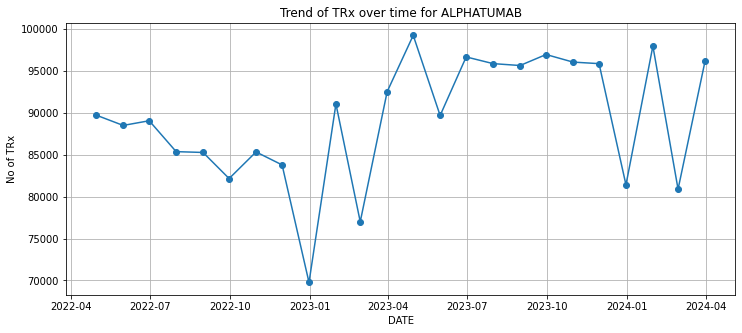

In [16]:
alphatumab_data = dataset[dataset['BRAND']=='ALPHATUMAB']
alphatumab_data.loc[:,'DATE'] = pd.to_datetime(alphatumab_data.loc[:,'DATE'])
monthly_data = alphatumab_data.resample('M', on='DATE').sum()
plt.figure(figsize = (12,5))
plt.plot(monthly_data.index , monthly_data['TRX_DERIVED'],  marker='o',  linestyle = '-')
plt.title('Trend of TRx over time for ALPHATUMAB')
plt.xlabel('DATE')
plt.ylabel('No of TRx')
plt.grid(True)
plt.show()

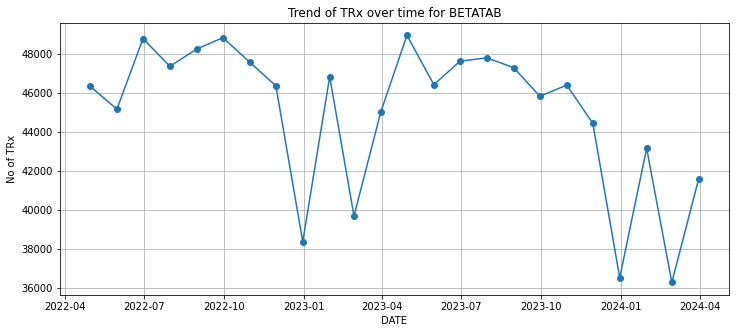

In [15]:
betatab_data = dataset[dataset['BRAND']=='BETATAB']
betatab_data.loc[:,'DATE'] = pd.to_datetime(betatab_data.loc[:,'DATE'])
monthly_data = betatab_data.resample('M', on='DATE').sum()
plt.figure(figsize = (12,5))
plt.plot(monthly_data.index , monthly_data['TRX_DERIVED'],  marker='o',  linestyle = '-')
plt.title('Trend of TRx over time for BETATAB')
plt.xlabel('DATE')
plt.ylabel('No of TRx')
plt.grid(True)
plt.show()

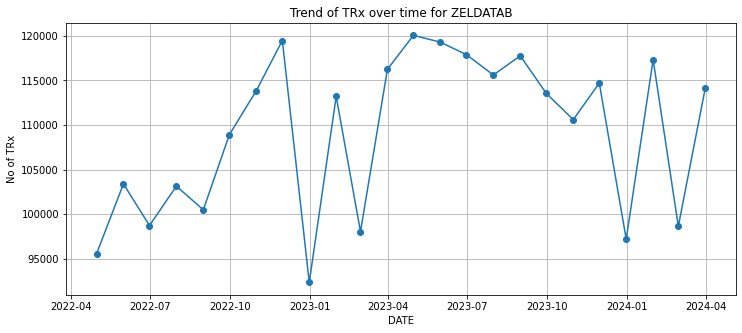

In [17]:
zeldatab_data = dataset[dataset['BRAND']=='ZELDATAB']
zeldatab_data.loc[:,'DATE'] = pd.to_datetime(zeldatab_data.loc[:,'DATE'])
monthly_data = zeldatab_data.resample('M', on='DATE').sum()
plt.figure(figsize = (12,5))
plt.plot(monthly_data.index , monthly_data['TRX_DERIVED'],  marker='o',  linestyle = '-')
plt.title('Trend of TRx over time for ZELDATAB')
plt.xlabel('DATE')
plt.ylabel('No of TRx')
plt.grid(True)
plt.show()

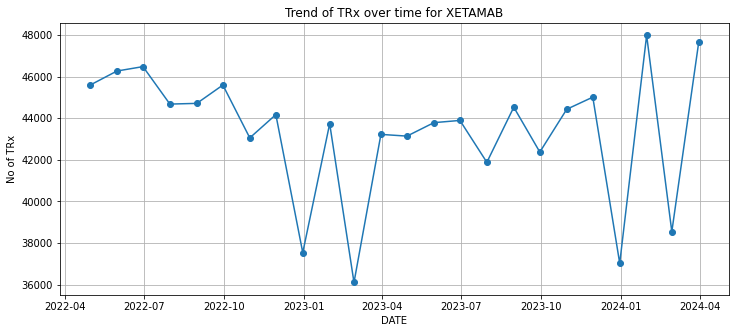

In [18]:
xetamab_data = dataset[dataset['BRAND']=='XETAMAB']
xetamab_data.loc[:,'DATE'] = pd.to_datetime(xetamab_data.loc[:,'DATE'])
monthly_data = xetamab_data.resample('M', on='DATE').sum()
plt.figure(figsize = (12,5))
plt.plot(monthly_data.index , monthly_data['TRX_DERIVED'],  marker='o',  linestyle = '-')
plt.title('Trend of TRx over time for XETAMAB')
plt.xlabel('DATE')
plt.ylabel('No of TRx')
plt.grid(True)
plt.show()

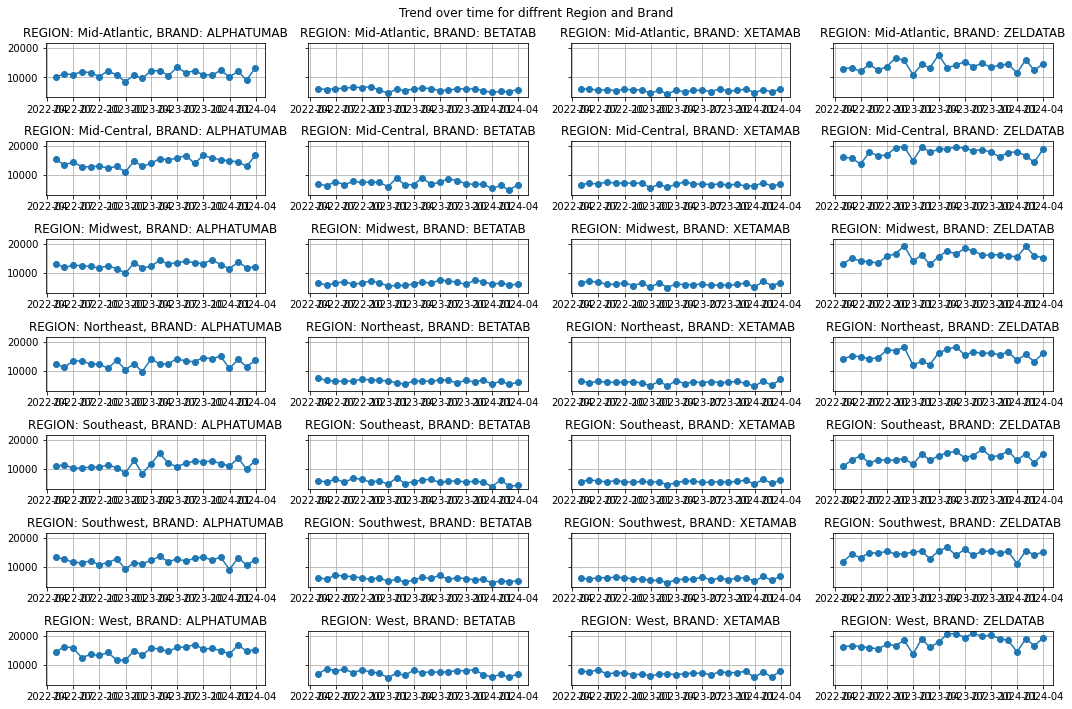

In [20]:
dataset['DATE'] = pd.to_datetime(dataset['DATE'])
grouped_data = dataset.groupby(['BRAND' , 'REGION', pd.Grouper(key = 'DATE', freq= 'M')]).sum().reset_index()
region_list = grouped_data['REGION'].unique()
brand_list = grouped_data['BRAND'].unique()
fig,axs = plt.subplots(len(region_list), len(brand_list) , figsize = (15,10), sharey=True)
fig.suptitle('Trend over time for diffrent Region and Brand')

for i, region in enumerate(region_list):
    for j, brand in enumerate(brand_list[:2]):
        region_brand_data = grouped_data[(grouped_data['REGION']== region) & (grouped_data['BRAND'] == brand)]
        axs[i,j].plot(region_brand_data['DATE'], region_brand_data['TRX_DERIVED'] , marker='o' , linestyle='-')
        axs[i,j].set_title(f'REGION: {region}, BRAND: {brand}')
        axs[i,j].set_xlable = ('Time')
        axs[i,j].set_ylable = ('No of TRx')
        axs[i,j].grid(True)
plt.tight_layout()
plt.show()